# Ratio Analysis

In [49]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import FundamentalAnalysis as fa
import FinanceDatabase as fd
import requests as req
from matplotlib.ticker import FuncFormatter

%matplotlib notebook

## 1- Datasets - Data Preparation

In [102]:
equities_industries = fd.show_options('equities', 'industries')
#fd.select_equities(industry= 'Beverages - Non-Alcoholic', country = 'United States')

In [129]:
#Retrieve data from some companies in the  Beverages non-alcoholic industry
api_key = 'c0c00c1cd114ca0ad0cf7227bb93c705'
tickers = ['KO','PEP','KDP', 'MNST', 'CELH', 'FIZZ', 'FTFT', 'WTER']
list_df = []

for ticker in tickers:
    url_link = 'https://financialmodelingprep.com/api/v3/ratios/{}?apikey={}'.format(ticker,api_key)
    ratios = pd.DataFrame.from_dict(req.get(url_link).json()).set_index('date')
    ratios.index  = pd.to_datetime(ratios.index, format = '%Y-%m-%d').to_period('Y')
    list_df.append(ratios.T)

ratios_beverages = pd.concat(list_df, axis = 1)    

In [99]:
ratios_beverages.head()

date,2020,2019,2018,2017,2016,2020,2019,2018,2017,2016,...,2020,2019,2018,2017,2016,2021,2020,2019,2018,2017
symbol,KO,KO,KO,KO,KO,PEP,PEP,PEP,PEP,PEP,...,FTFT,FTFT,FTFT,FTFT,FTFT,WTER,WTER,WTER,WTER,WTER
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
currentRatio,1.31772,0.75672,1.04828,1.34386,1.28185,0.984126,0.862372,0.988933,1.51336,1.28171,...,2.99374,0.468451,0.206226,0.525468,1.32026,1.75711,1.01427,2.3208,0.873229,0.918612
quickRatio,0.962811,0.561524,0.662492,0.895124,0.982097,0.768227,0.662724,0.728837,1.29422,1.07968,...,1.9039,0.00272084,0.205688,0.495502,0.479204,1.32808,0.677845,1.97884,0.641185,0.589918
cashRatio,0.465379,0.24024,0.305444,0.220858,0.322441,0.350205,0.269244,0.393938,0.51751,0.43331,...,1.88809,0.00265948,0.00216605,0.0388821,0.0148566,0.689439,0.326215,1.54826,0.17672,0.176065


In [101]:
ratios_beverages.to_excel('Ratios of Beverages - Non-alcoholic Industry.xlsx')

In [109]:
#Retrieve data from only Coca-Cola
ticker = 'KO'
api_key = 'c0c00c1cd114ca0ad0cf7227bb93c705'
url_link = 'https://financialmodelingprep.com/api/v3/ratios/{}?apikey={}'.format(ticker,api_key)
ratios = pd.DataFrame.from_dict(req.get(url_link).json()).set_index('date')
ratios.index  = pd.to_datetime(ratios.index, format = '%Y-%m-%d').to_period('Y')
display(ratios.T.head())
ratios.T.to_excel('Coca Cola Ratios - 2016 to 2020.xlsx')

date,2020,2019,2018,2017,2016
symbol,KO,KO,KO,KO,KO
period,FY,FY,FY,FY,FY
currentRatio,1.31772,0.75672,1.04828,1.34386,1.28185
quickRatio,0.962811,0.561524,0.662492,0.895124,0.982097
cashRatio,0.465379,0.24024,0.305444,0.220858,0.322441


## 2- Profitability Ratios

- Profitability ratios are a class of financial metrics that are used to assess a business's ability to generate earnings relative to its revenue, operating costs, balance sheet assets, or shareholders' equity over time, using data from a specific point in time.

In [23]:
prof_ratios = ['cashRatio',
'grossProfitMargin',
'operatingProfitMargin',
'netProfitMargin',
'returnOnAssets',
'returnOnEquity',
'returnOnCapitalEmployed']

In [25]:
prof_df = ratios[prof_ratios].rename(columns = {'cashRatio': 'Cash Ratio', 'grossProfitMargin': 'Gross Profit Margin',
                                                'operatingProfitMargin': 'Operating Profit Margin', 'netProfitMargin': 'Net Profit Margin', 'returnOnAssets': 'Return on Assets',
                                                'returnOnEquity':'Return On Equity', 'returnOnCapitalEmployed': 'Return On Capital Employed'})
prof_df

,Cash Ratio,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return On Equity,Return On Capital Employed
date,,,,,,,
2020,0.465379,0.593112,0.272521,0.234658,0.088744,0.363982,0.123764
2019,0.240240,0.607712,0.270649,0.239360,0.103263,0.422789,0.169775
2018,0.305444,0.630525,0.287293,0.201971,0.077317,0.337601,0.169503
2017,0.220858,0.625642,0.219006,0.035244,0.014199,0.065764,0.127755
2016,0.322441,0.606693,0.206794,0.155913,0.074791,0.281094,0.142530


<Figure size 432x288 with 0 Axes>

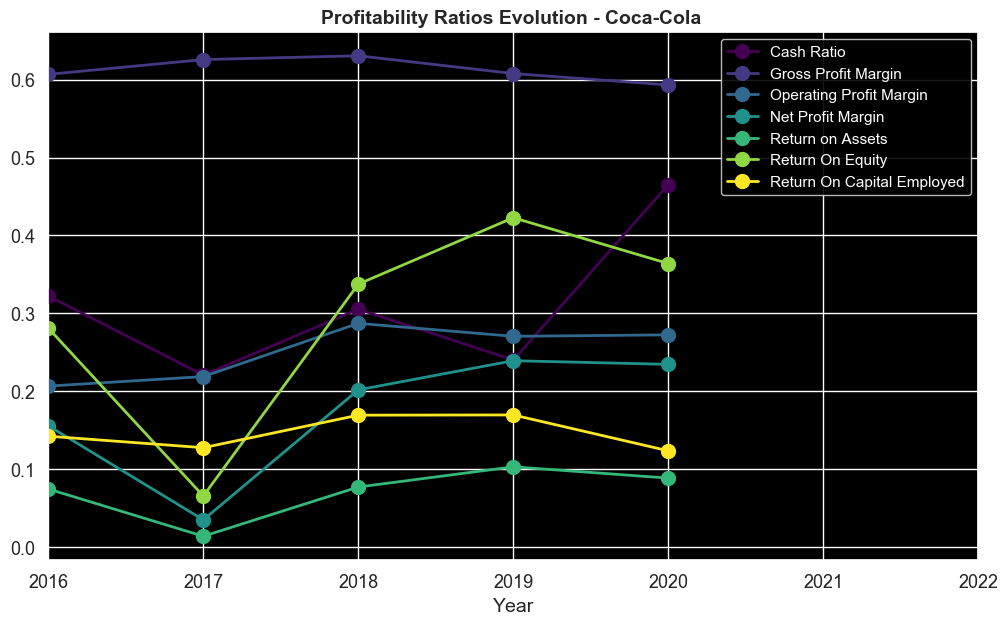

In [39]:
#Style
sea.set( rc = {'axes.facecolor':'black', 'axes.grid': True} )
#sea.set_style('darkgrid', {'axes.grid': True})

#PLot
plt.figure()
prof_df.plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 2, markersize = 10, colormap = 'viridis')

plt.xlabel('Year', fontsize = 14)
#plt.ylabel('Amount of Mone,  fontsize = 14)
plt.title('Profitability Ratios Evolution - Coca-Cola ',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
plt.setp(legend.get_texts(), color = 'white')


#Setting
plt.gcf().set_size_inches(12, 7)
plt.gcf().set_dpi(100)
plt.gca().set_xlim(['2016','2022'])

#Save Fig
plt.savefig('Profitability Ratios.PNG', quality = 97, optimize = True)

## 3- . EfficiencyRatios

- "Efficiency ratios, also known as activity ratios, are used by analysts to measure the performance of a company's short-term or current performance. All these ratios use numbers in a company's current assets or current liabilities, quantifying the operations of the business". by: investopedia.com

In [113]:
act_ratios = ['receivablesTurnover',
'inventoryTurnover',
'fixedAssetTurnover',
'assetTurnover']

In [114]:
act_df = ratios[act_ratios].rename(columns = {'receivablesTurnover': 'Receivables Turnover', 'inventoryTurnover': 'Inventory Turnover',
                                                'fixedAssetTurnover': 'Fixed Asset Turnover', 'assetTurnover': 'Asset Turnover'})
act_df

,Receivables Turnover,Inventory Turnover,Fixed Asset Turnover,Asset Turnover
date,,,,
2020,10.500636,4.112982,3.063376,0.378185
2019,9.384538,4.326428,3.438457,0.431414
2018,9.380448,4.255242,3.869776,0.382811
2017,9.656395,4.992844,4.316713,0.402862
2016,10.856587,6.155140,3.936342,0.479695


<IPython.core.display.Javascript object>


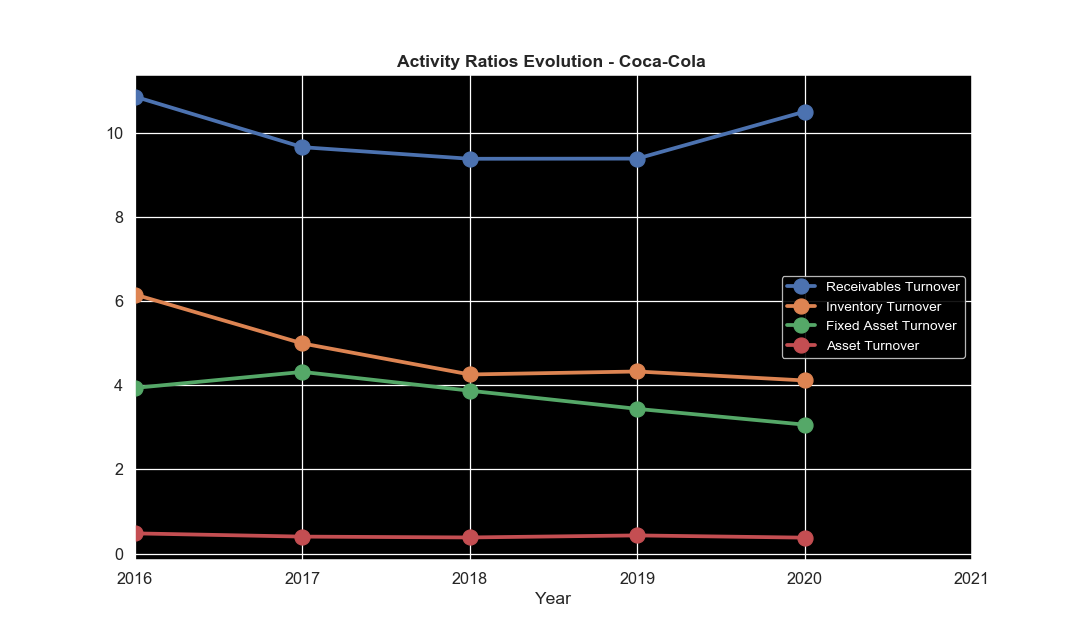

In [123]:
#Style
sea.set( rc = {'axes.facecolor':'black', 'axes.grid': True} )
#sea.set_style('darkgrid', {'axes.grid': True})

#PLot
act_df.plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 3, markersize = 12)

plt.xlabel('Year', fontsize = 14)
#plt.ylabel('Amount of Mone,  fontsize = 14)
plt.title('Activity Ratios Evolution - Coca-Cola ',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
plt.setp(legend.get_texts(), color = 'white')


#Setting
plt.gcf().set_size_inches(12, 7)
plt.gcf().set_dpi(100)
plt.gca().set_xlim(['2016','2021'])

#Save Fig
plt.savefig('Activity Ratios.PNG', quality = 97, optimize = True)

## 4- Market Ratios

- Ratios commonly used in fundamental analysis.

In [154]:
df_market = ratios_beverages.loc[['priceEarningsRatio',"dividendYield","dividendPayoutRatio", "symbol"],:]
df_market

date,2020,2019,2018,2017,2016,2020,2019,2018,2017,2016,...,2020,2019,2018,2017,2016,2021,2020,2019,2018,2017
priceEarningsRatio,26.7693,28.2158,31.681,162.288,27.369,27.1697,27.1881,12.3037,35.1101,23.3954,...,2.24216,-1.20483,-0.101819,-0.147812,-4.93038,-4.78612,-2.90126,-8.41143,-3.08692,-5.8067
dividendYield,0.0339808,0.0271967,0.0325949,0.0312044,0.0338283,0.0284779,0.0266729,0.0320171,0.0262242,0.0285474,...,None,None,None,None,None,None,None,None,None,None
dividendPayoutRatio,0.909642,0.767377,1.03264,5.0641,0.925846,0.773736,0.725185,0.393927,0.920733,0.667878,...,None,None,None,None,None,None,None,None,None,None
symbol,KO,KO,KO,KO,KO,PEP,PEP,PEP,PEP,PEP,...,FTFT,FTFT,FTFT,FTFT,FTFT,WTER,WTER,WTER,WTER,WTER


In [207]:
ticker_name ={'KO':'Coca-Cola Co',
 'PEP':'PepsiCo Inc',
 'KDP': 'Keurig Dr Pepper Inc',
 'MNST': 'Monster Beverage Corp.',
'FIZZ': 'National Beverage Corp.',
'CELH': 'Celsius Holdings Inc',
 'FTFT':'Future FinTech Group Inc',
'WTER': 'Alkaline Water Company Inc (The)',}

### 4.1- Price to Earning RAtio (R/E)

- P/E ratio = Market value per share/ Earning per share

- This ratio helps us to determine if a stock is overvalued or undervalued.  

- The metric shows how much investors are willing to pay for a share to have  $1 of earning

- A High P/E ratio could be an indicator that investors expect earnings growth in the future because they have bought stock anticipated of its appreciation.


In [218]:
ratio = 'priceEarningsRatio'

In [220]:
def ratio_dataframe(ratio):
    p_e = df_market.T[['symbol',ratio]].reset_index()
    #p_e.index= p_e.index.astype(str).astype(int)
    df_pe = pd.pivot_table(data = p_e, values = ratio, columns = ['symbol'], index = ['date'], aggfunc= np.sum)
    df_pe.drop(df_pe.index[[0,1,-1]], inplace = True)
    df_pe = df_pe.rename(columns =ticker_name )
    return df_pe
ratio_dataframe('priceEarningsRatio')

symbol,Celsius Holdings Inc,National Beverage Corp.,Future FinTech Group Inc,Keurig Dr Pepper Inc,Coca-Cola Co,Monster Beverage Corp.,PepsiCo Inc,Alkaline Water Company Inc (The)
date,,,,,,,,
2018,-16.926751,28.685456,-0.101819,49.272788,31.681030,31.544558,12.303660,-3.086918
2019,33.941980,16.868305,-1.204826,32.149938,28.215848,32.795695,27.188113,-8.411427
2020,439.756462,20.861557,2.242164,33.775199,26.769338,32.536442,27.169718,-2.901261


In [228]:
ratio_dataframe('priceEarningsRatio')['Coca-Cola Co'].values

array([31.68102957, 28.21584801, 26.76933763])

<IPython.core.display.Javascript object>


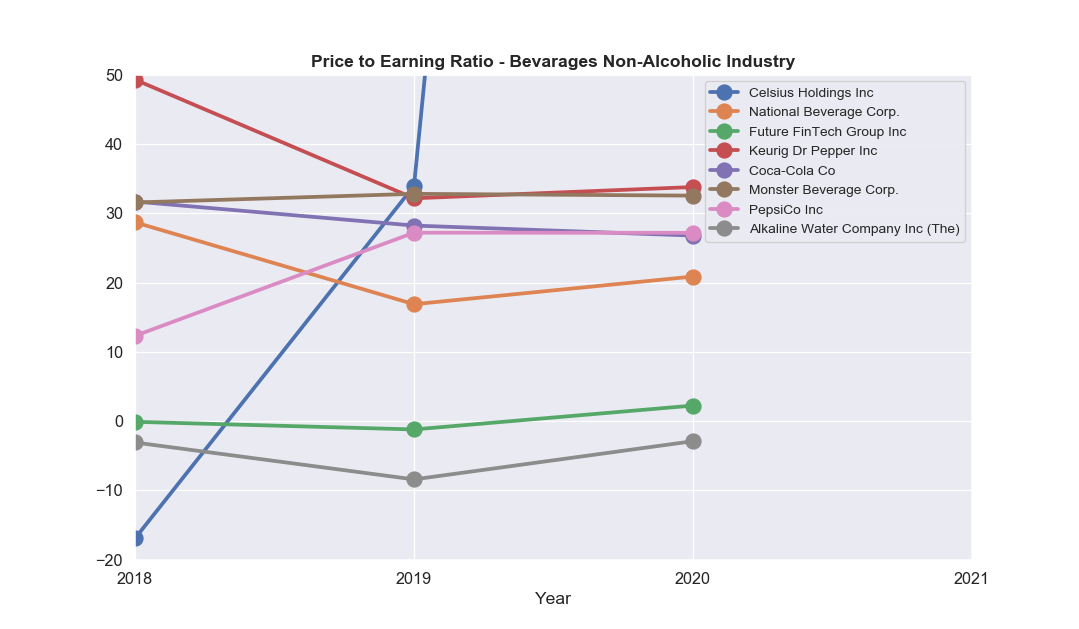

In [222]:
#Style
#sea.set( rc = {'axes.facecolor':'black', 'axes.grid': True} )
sea.set_style('darkgrid', {'axes.grid': True})

#PLot
ratio_dataframe('priceEarningsRatio').plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 3, markersize = 12)

plt.xlabel('Year', fontsize = 14)
#plt.ylabel('Amount of Mone,  fontsize = 14)
plt.title('Price to Earning Ratio - Bevarages Non-Alcoholic Industry',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
#plt.setp(legend.get_texts(), color = 'white')


#Setting
plt.gcf().set_size_inches(12, 7)
plt.gcf().set_dpi(100)
plt.gca().set_ylim([-20,50])
plt.gca().set_xlim(['2018','2021'])

#Save Fig
plt.savefig('PE Ratio - Bevarages Non-Alcoholic Industry.PNG', quality = 97, optimize = True)

### 4.2- Dividend Yied

- DY =  Annual dividend per share/price per share

- The DY estimates the dividend return of a stock

- According to analysts at Hartford Funds, since 1970, 84% of the total returns from the S&P 500 are from dividends.

- Investors must pay attention to high DY once the price per share is the denominator of the DY equation. So, when the stock price is in decline or the dividend paid is increased, or both,  the DY will rise. Then take care to not take misleading affirmations.


In [223]:
ratio_dataframe('dividendYield')

symbol,Celsius Holdings Inc,National Beverage Corp.,Future FinTech Group Inc,Keurig Dr Pepper Inc,Coca-Cola Co,Monster Beverage Corp.,PepsiCo Inc,Alkaline Water Company Inc (The)
date,,,,,,,,
2018,0.0,0.016265,0.0,0.008035,0.032595,0.0,0.032017,0.0
2019,0.0,0.056923,0.0,0.020935,0.027197,0.0,0.026673,0.0
2020,0.0,0.000000,0.0,0.018904,0.033981,0.0,0.028478,0.0


In [232]:
ratio_dataframe('dividendYield')['Coca-Cola Co'].values *100

array([3.2594872 , 2.71966549, 3.39807602])

<IPython.core.display.Javascript object>


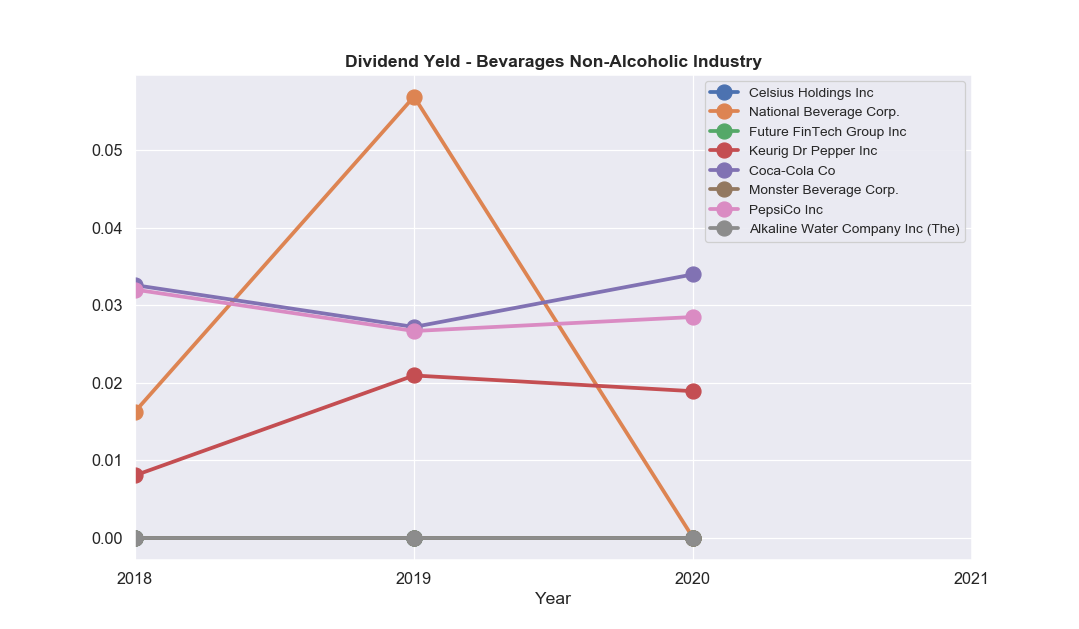

In [225]:
#Style
#sea.set( rc = {'axes.facecolor':'black', 'axes.grid': True} )
sea.set_style('darkgrid', {'axes.grid': True})

#PLot
ratio_dataframe('dividendYield').plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 3, markersize = 12)

plt.xlabel('Year', fontsize = 14)
#plt.ylabel('Amount of Mone,  fontsize = 14)
plt.title('Dividend Yeld - Bevarages Non-Alcoholic Industry',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
#plt.setp(legend.get_texts(), color = 'white')


#Setting
plt.gcf().set_size_inches(12, 7)
plt.gcf().set_dpi(100)
plt.gca().set_xlim(['2018','2021'])

#Save Fig
plt.savefig('DY - Bevarages Non-Alcoholic Industry.PNG', quality = 97, optimize = True)